In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O sonnets.txt

--2022-04-16 18:12:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-04-16 18:12:05 (63.7 MB/s) - ‘sonnets.txt’ saved [93578/93578]



In [ ]:
data = open('sonnets.txt').read()

In [ ]:
data

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThyself thy foe, to thy sweet self too cruel.\nThou that art now the world's fresh ornament\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest thy content\nAnd, tender churl, makest waste in niggarding.\nPity the world, or else this glutton be,\nTo eat the world's due, by the grave and thee.\nWhen forty winters shall beseige thy brow,\nAnd dig deep trenches in thy beauty's field,\nThy youth's proud livery, so gazed on now,\nWill be a tatter'd weed, of small worth held:\nThen being ask'd where all thy beauty lies,\nWhere all the treasure of thy lusty days,\nTo say, within thine own deep-sunken eyes,\nWere an all-eating shame and thriftless praise.\nHow much mor

In [ ]:
corpus = data.lower().split("\n")

In [ ]:
corpus

['from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou, contracted to thine own bright eyes,',
 "feed'st thy light'st flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thyself thy foe, to thy sweet self too cruel.',
 "thou that art now the world's fresh ornament",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content',
 'and, tender churl, makest waste in niggarding.',
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 'when forty winters shall beseige thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery, so gazed on now,",
 "will be a tatter'd weed, of small worth held:",
 "then being ask'd where all thy beauty lies,",
 'where all the treasure of thy lusty days,',
 'to say, within thine own deep-sunken eyes,',

In [ ]:
len(corpus)

2159

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(corpus)

In [ ]:
total_words = len(tokenizer.word_index)+1

In [ ]:
total_words

3211

In [ ]:
tokenizer.word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) # pad sequences 

In [ ]:
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

In [ ]:
input_sequences.shape

(15462, 11)

In [ ]:
max_sequence_len

11

In [ ]:
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

In [ ]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

In [ ]:
predictors

array([[   0,    0,    0, ...,    0,    0,   34],
       [   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       ...,
       [   0,    0,    0, ..., 3209,  493,  493],
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15]], dtype=int32)

In [ ]:
predictors.shape

(15462, 10)

In [ ]:
label

array([ 417,  877,  166, ..., 3210,   15,   14], dtype=int32)

In [ ]:
label.shape

(15462,)

In [ ]:
label = ku.to_categorical(label, num_classes = total_words)

In [ ]:
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
label.shape

(15462, 3211)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 240, input_length=10))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 240)           770640    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              469200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 3211)              966511    
                                                                 
Total params: 2,206,351
Trainable params: 2,206,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = Adam(learning_rate = 0.01)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 40s 75ms/step - loss: 6.8450 - accuracy: 0.0303
Epoch 2/100
484/484 [==============================] - 37s 76ms/step - loss: 6.2950 - accuracy: 0.0475
Epoch 3/100
484/484 [==============================] - 36s 75ms/step - loss: 5.9118 - accuracy: 0.0603
Epoch 4/100
484/484 [==============================] - 37s 76ms/step - loss: 5.5725 - accuracy: 0.0687
Epoch 5/100
484/484 [==============================] - 37s 76ms/step - loss: 5.2343 - accuracy: 0.0839
Epoch 6/100
484/484 [==============================] - 37s 76ms/step - loss: 4.8931 - accuracy: 0.1017
Epoch 7/100
484/484 [==============================] - 36s 75ms/step - loss: 4.4976 - accuracy: 0.1352
Epoch 8/100
484/484 [==============================] - 36s 74ms/step - loss: 4.1198 - accuracy: 0.1696
Epoch 9/100
484/484 [==============================] - 36s 75ms/step - loss: 3.7687 - accuracy: 0.2156
Epoch 10/100
484/484 [==============================] - 37s 75ms/step - l

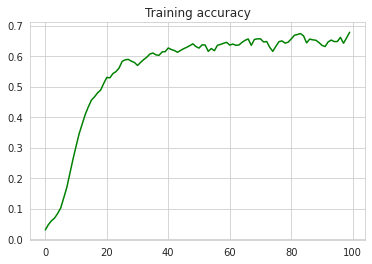

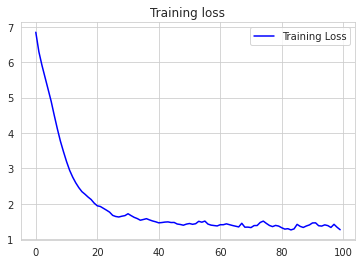

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy',color='green')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "help me obi wan kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0))
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

help me obi wan kenobi, you're my only hope of thy fair can sit who thee ' add enough will may times poor bends once well done my love me soon ' add are ' make me me me thee the meadows ' would bar done ' ' know what ' a beauty sight it thine antique face fearful not do none give for ' know me one despite thee i'll not if ' know fearful will to love's wrong dwellers life much disdain fearful heart's ' would wrong hate poor thrivers proud livery so head beauty dead pain heaven away ' add or ' ' learn ' have
